In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
#To distinguish between the two regions, we add a new column named region to the DataFrame. We assign label 0 to all rows up to index 122 (Bejaia region) and label 1 to rows from index 123 onwards (Sidi Bel Abbes region).
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1
df['Region']=df['Region'].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
# drop 122 row that has all null values
df=df.dropna().reset_index(drop=True)
df.head()
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [ ]:
df=df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          0 non-null      int64  
 1   month        0 non-null      int64  
 2   year         0 non-null      int64  
 3   Temperature  0 non-null      int64  
 4   RH           0 non-null      int64  
 5   Ws           0 non-null      int64  
 6   Rain         0 non-null      float64
 7   FFMC         0 non-null      float64
 8   DMC          0 non-null      float64
 9   DC           0 non-null      float64
 10  ISI          0 non-null      float64
 11  BUI          0 non-null      float64
 12  FWI          0 non-null      float64
 13  Classes      0 non-null      object 
 14  Region       0 non-null      int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 132.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 15 columns):
 #   Column       Non-Null Count 

In [ ]:
# changing other columns to float data type
objects=[features for features in df.columns if df[features].dtypes=='O']
for i in objects:
  if i!='Classes':
    df[i]=df[i].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          0 non-null      int64  
 1   month        0 non-null      int64  
 2   year         0 non-null      int64  
 3   Temperature  0 non-null      int64  
 4   RH           0 non-null      int64  
 5   Ws           0 non-null      int64  
 6   Rain         0 non-null      float64
 7   FFMC         0 non-null      float64
 8   DMC          0 non-null      float64
 9   DC           0 non-null      float64
 10  ISI          0 non-null      float64
 11  BUI          0 non-null      float64
 12  FWI          0 non-null      float64
 13  Classes      0 non-null      object 
 14  Region       0 non-null      int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 132.0+ bytes


In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# new part after getting cleaned dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df=pd.read_csv("/content/Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [18]:
# dropping faltu items not needed now
df=df.drop(['day','month','year'],axis=1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [21]:
df['Classes']=df['Classes'].str.strip()
df['Classes'].unique()
df['Classes']=np.where(df['Classes']=='fire',1,0)
df['Classes'].unique()


array([0, 1])

In [22]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


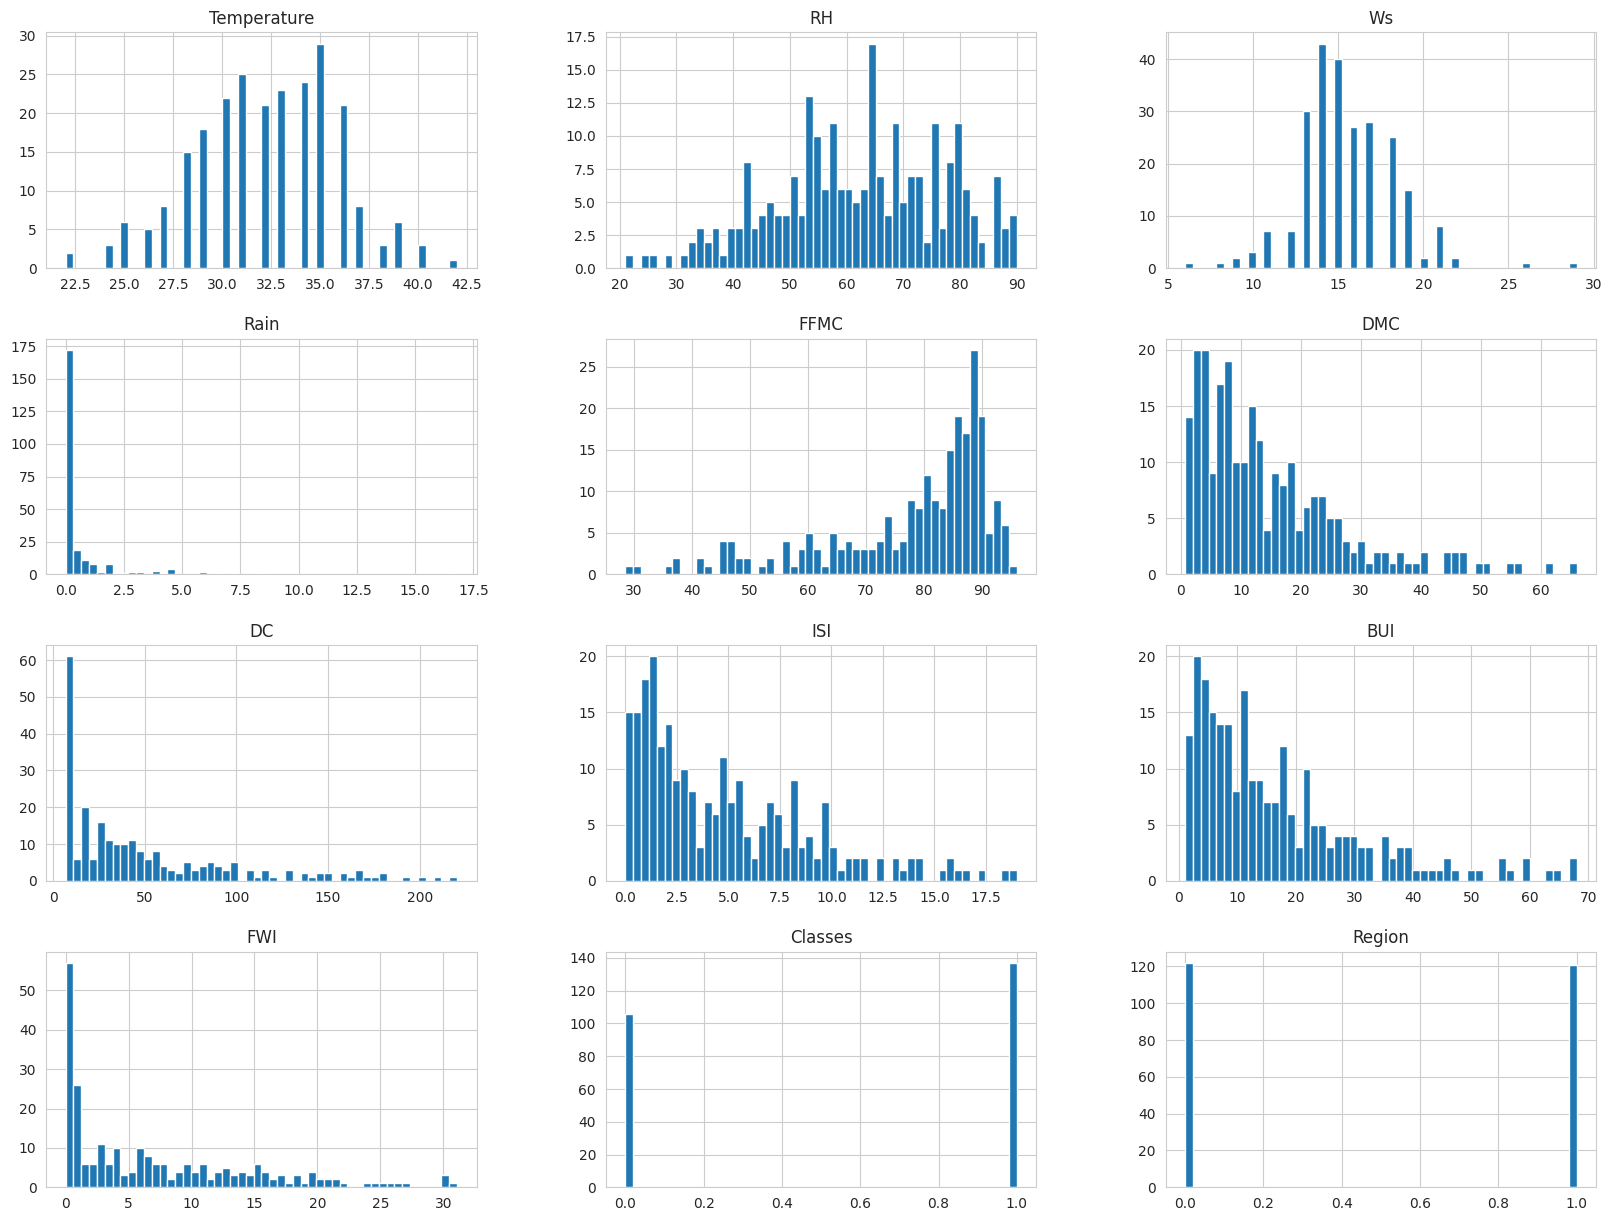

In [23]:
sns.set_style('whitegrid')
df.hist(bins=50, figsize=(20,15))
plt.show()

([<matplotlib.patches.Wedge at 0x7d498fc1cef0>,
 [Text(-0.5251867081006251, -0.9665293175245275, 'Not Fire'),
  Text(0.5251863931653707, 0.966529488652027, 'Fire')],
 [Text(-0.28646547714579546, -0.5271978095588331, '56.4%'),
  Text(0.28646530536292947, 0.5271979029011056, '43.6%')])

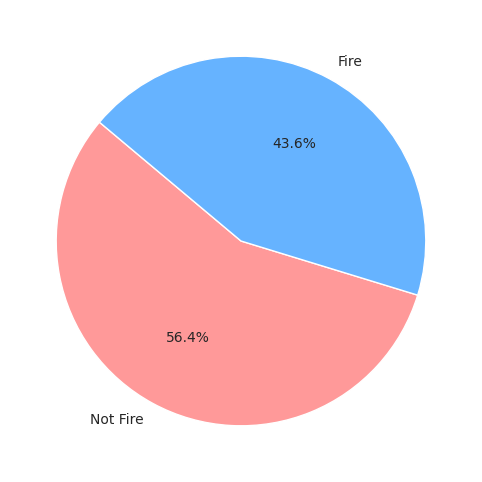

In [25]:
# Calculate class percentages
percentage = df['Classes'].value_counts(normalize=True) * 100

# Define labels
labels = ['Not Fire', 'Fire']
# pLOT pIE
plt.figure(figsize=(8, 6))
plt.pie(percentage, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])

In [26]:
# Compute correlation matrix
corr = df.corr()

# Display correlation matrix
print(corr)

             Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651400 -0.284510 -0.326492  0.676568  0.485687   
RH             -0.651400  1.000000  0.244048  0.222356 -0.644873 -0.408519   
Ws             -0.284510  0.244048  1.000000  0.171506 -0.166548 -0.000721   
Rain           -0.326492  0.222356  0.171506  1.000000 -0.543906 -0.288773   
FFMC            0.676568 -0.644873 -0.166548 -0.543906  1.000000  0.603608   
DMC             0.485687 -0.408519 -0.000721 -0.288773  0.603608  1.000000   
DC              0.376284 -0.226941  0.079135 -0.298023  0.507397  0.875925   
ISI             0.603871 -0.686667  0.008532 -0.347484  0.740007  0.680454   
BUI             0.459789 -0.353841  0.031438 -0.299852  0.592011  0.982248   
FWI             0.566670 -0.580957  0.032368 -0.324422  0.691132  0.875864   
Classes         0.516015 -0.432161 -0.069964 -0.379097  0.769492  0.585658   
Region          0.269555 -0.402682 -0.181160 -0.040013  0.222241

<Axes: >

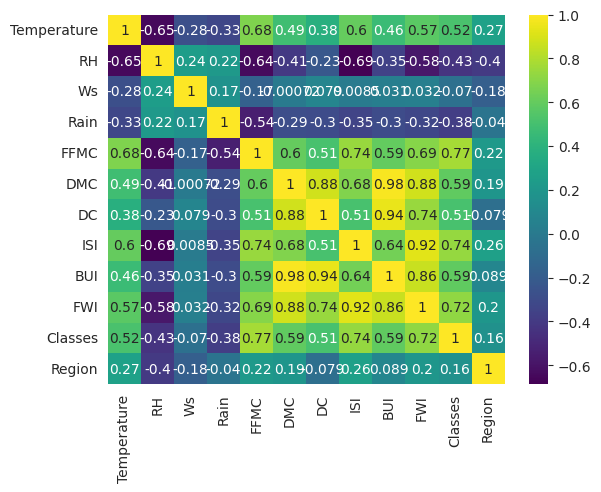

In [29]:
sns.heatmap(corr,annot=True ,cmap='viridis')

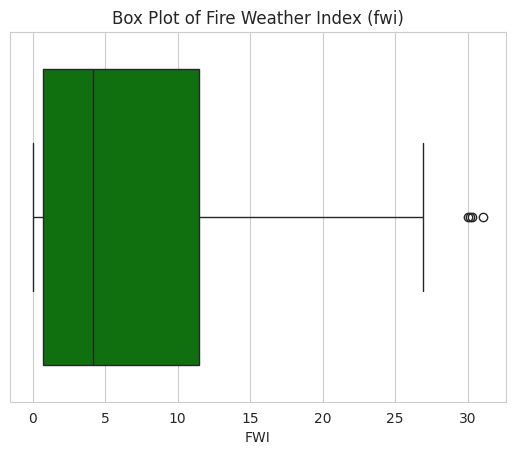

In [33]:
sns.boxplot(x=df['FWI'], color='green')
plt.title('Box Plot of Fire Weather Index (fwi)')
plt.show()

In [35]:
# Filter data for region 1 (Bejaia)
df_region1 = df[df['Region'] == 1]

plt.figure(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df_region1)
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of Fires', fontweight='bold')
plt.title('Fire Analysis of Bejaia Region')
plt.show()
# since here i have deleted month earlier so it wont work but no worries cocncept understood:)

ValueError: Could not interpret value `month` for `x`. An entry with this name does not appear in `data`.

<Figure size 1300x600 with 0 Axes>